In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, NullFormatter



data sources: 
https://www.in2013dollars.com/bitcoin-price
https://en.wikipedia.org/wiki/Hyperinflation_in_the_Weimar_Republic#/media/File:Germany_Hyperinflation.svg

In [244]:
def wrangle(data):
    df = pd.read_csv(data)
    return df

In [245]:
marks = wrangle('./data/marks.csv')
bitcoin = wrangle('./data/bitcoin.csv')

In [246]:
marks['adj_year'] = marks['year'] - marks['year'].min()
marks = marks.sort_values(by='adj_year')
marks['price'] = 10**marks['papermarks']

In [247]:
bitcoin['year'] = np.round(bitcoin['Year'] + ((bitcoin['Month'] - 1) / 12), 3)
bitcoin['adj_year'] = bitcoin['year'] - bitcoin['year'].min() -.5
bitcoin = bitcoin.sort_values(by='adj_year')
bitcoin['price'] = bitcoin['Bitcoin Price ($)']


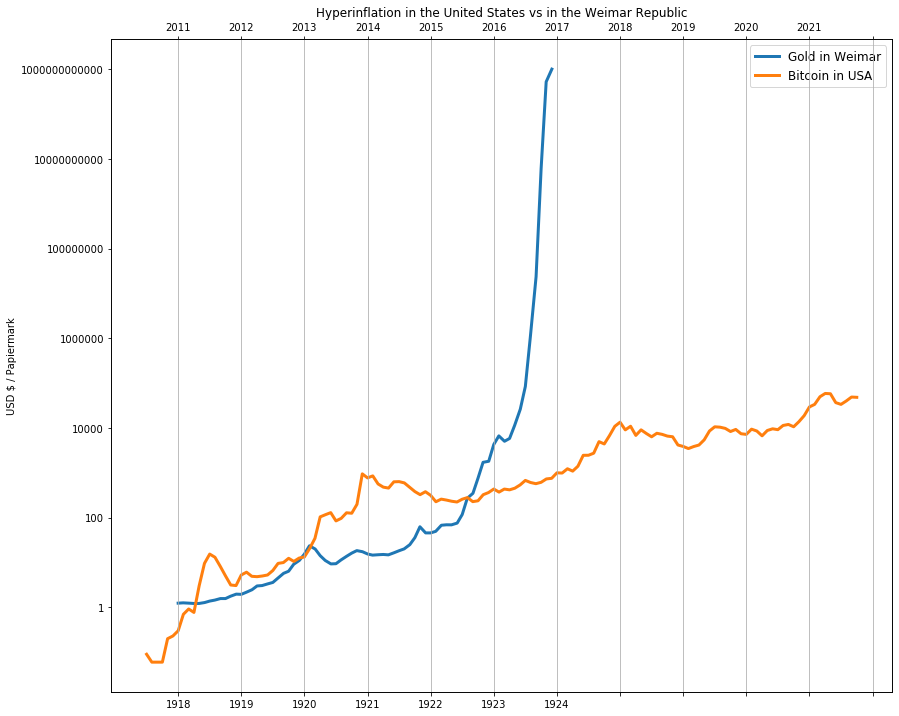

In [301]:
fig, ax1 = plt.subplots(figsize=(14, 12))
plt.plot(marks['adj_year'], marks['price'], lw=3)
plt.plot(bitcoin['adj_year'], bitcoin['price'], lw=3)
ax1.ticklabel_format(style='plain')
ax1.set_ylabel('USD $ / Papiermark')
plt.yscale('log')
plt.xticks(np.arange(0, 12, step=1), ['1918', '1919', '1920', '1921', '1922', '1923', '1924'])

ax2 = ax1.twiny()
ax2.set_xticks(ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

ax1.legend(['Gold in Weimar', 'Bitcoin in USA'], fontsize='large')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax1.yaxis.set_minor_formatter(NullFormatter())
plt.grid(axis = 'x')
plt.title('Hyperinflation in the United States vs in the Weimar Republic')
plt.show()

In [281]:
marks['type'] = 'marks'
bitcoin['type'] = 'bitcoin'
total = pd.concat([marks, bitcoin]).reset_index(drop=True)
total = total[['type', 'adj_year', 'price', 'year']]

In [250]:
total.to_csv('./data/adjusted.csv')